# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

## Data Description:
 
## The file EastWest Airlines contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

* ID --Unique ID

* Balance--Number of miles eligible for award travel

* Qual_mile--Number of miles counted as qualifying for Topflight status

* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

**1 = under 5,000**

**2 = 5,000 - 10,000**

**3 = 10,001 - 25,000**

**4 = 25,001 - 50,000**

**5 = over 50,000**

* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

* Bonus_trans--Number of non-flight bonus transactions in the past 12 months

* Flight_miles_12mo--Number of flight miles in the past 12 months

* Flight_trans_12--Number of flight transactions in the past 12 months

* Days_since_enrolled--Number of days since enrolled in flier program

* Award--whether that person had award flight (free flight) or not

# Work Flow
### 1. Load the data
### 2. EDA
### 3. Scaled the data
### 4. Finding Optimum value of cluster
### 5. Build the Model
### 6. Check the performance
### 7. Conclusion

## 1.Load The data

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('EastWestAirlines.csv',index_col='ID#',header=0)

In [4]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


# 2. EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


All columns have right data types.

In [6]:
df.shape

(3999, 11)

In [7]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
# Let's rename the column
df.rename(columns={'Flight_miles_12mo':'Flight_miles_12month','Award?':'Award','Flight_trans_12':'Flight_trans_12month'}, inplace=True)

In [9]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [11]:
# Check the duplicate values
df.duplicated().sum()

1

In [12]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Check the null values
df.isna().sum()

Balance                 0
Qual_miles              0
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles             0
Bonus_trans             0
Flight_miles_12month    0
Flight_trans_12month    0
Days_since_enroll       0
Award                   0
dtype: int64

There is no null values are present in this dataset.

# 3. Scaled the data

### 3.1 MinMax Scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
minmax = MinMaxScaler()

In [17]:
minmax_df = minmax.fit_transform(df)
minmax_df[:1]

array([[1.65077268e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.59878264e-04, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00]])

## 3.2 Standard Scaler

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
std = StandardScaler()

In [20]:
std_df = std.fit_transform(df)
std_df[:1]

array([[-0.45129387, -0.18632279, -0.76973166, -0.09825429, -0.06277446,
        -0.70292027, -1.10443028, -0.32864879, -0.3622191 ,  1.39523468,
        -0.76707163]])

## 3.3 Normalizer

In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
norm = Normalizer()

In [23]:
norm_df = norm.fit_transform(df)
norm_df[:1]

array([[9.70414393e-01, 0.00000000e+00, 3.44815547e-05, 3.44815547e-05,
        3.44815547e-05, 5.99979051e-03, 3.44815547e-05, 0.00000000e+00,
        0.00000000e+00, 2.41370883e-01, 0.00000000e+00]])

## 3.4 MaxAbsScaler

In [24]:
from sklearn.preprocessing import MaxAbsScaler

In [25]:
maxabs = MaxAbsScaler()

In [26]:
maxabs_df = maxabs.fit_transform(df)

In [27]:
maxabs_df[:1]

array([[1.65077268e-02, 0.00000000e+00, 2.00000000e-01, 3.33333333e-01,
        2.00000000e-01, 6.59878264e-04, 1.16279070e-02, 0.00000000e+00,
        0.00000000e+00, 8.43780135e-01, 0.00000000e+00]])

## 3.5 PowerTransformer

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
power = PowerTransformer( standardize=False)

In [30]:
power_df = power.fit_transform(df)
power_df[:1]

array([[ 2.60449289e+01, -0.00000000e+00,  4.21643271e-01,
         2.13922282e-02,  2.18912544e-02,  9.84328189e+00,
         7.99559500e-01, -0.00000000e+00, -0.00000000e+00,
         8.14680365e+02, -0.00000000e+00]])

## 3.6 QuantileTransformer

In [31]:
from sklearn.preprocessing import QuantileTransformer

In [32]:
quantile = QuantileTransformer()

In [33]:
quan_df = quantile.fit_transform(df)
quan_df[:1]

array([[0.36640601, 0.        , 0.        , 0.        , 0.        ,
        0.14014014, 0.14514515, 0.        , 0.        , 0.9010326 ,
        0.        ]])

## 3.7 Divide by Maximum

In [34]:
maxdiv_df = df.apply(lambda x: x/(max(x)+0.0001))

In [35]:
maxdiv_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
ID#,,,,,,,,,,,
1,0.016508,0.0,0.199996,0.333322,0.199996,0.000660,0.011628,0.000000,0.000000,0.843780,0.0000
2,0.011288,0.0,0.199996,0.333322,0.199996,0.000815,0.023256,0.000000,0.000000,0.839923,0.0000
3,0.024257,0.0,0.199996,0.333322,0.199996,0.015636,0.046512,0.000000,0.000000,0.847878,0.0000
4,0.008667,0.0,0.199996,0.333322,0.199996,0.001896,0.011628,0.000000,0.000000,0.837994,0.0000
5,0.057338,0.0,0.799984,0.333322,0.199996,0.164211,0.302325,0.067398,0.075472,0.835945,0.9999


# 4. Find The optimal number of clusters

In [36]:
from sklearn.cluster import KMeans

In [37]:
WCSS = []
for i in range(1,20):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(df)
    WCSS.append(model.inertia_)
WCSS

[42956247163679.82,
 20820865882330.6,
 11789048776090.918,
 7548625331980.041,
 5724130459573.597,
 4549961263876.913,
 3696955612374.2686,
 3271521290570.679,
 2897844691873.2456,
 2622313934430.213,
 2380280457853.7466,
 2143945271531.1978,
 1965856746744.108,
 1829179218921.6592,
 1705676772652.8674,
 1579844845335.1663,
 1462813631512.6973,
 1376023839478.6162,
 1338562607394.8247]

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

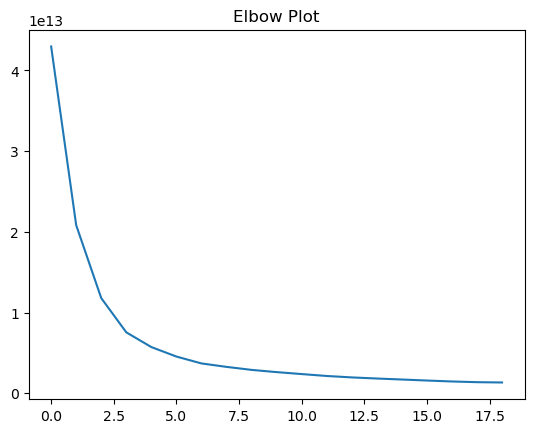

In [39]:
plt.plot(WCSS)
plt.title('Elbow Plot')
plt.show()

We can see n_cluster = 3 is the optimal value

# 5. Let's Build the model with different Scaled data

## 5.1 KMeans clustering

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
scaled_df_list = [minmax_df,std_df,norm_df,maxabs_df,power_df,quan_df,maxdiv_df]
df_list = ['minmax_df','std_df','norm_df','maxabs_df','power_df','quan_df','maxdiv_df']

In [42]:
print(df_list)
for data in scaled_df_list:
    model = KMeans(n_clusters=3)
    model.fit(data)
    labels = model.labels_
    print(silhouette_score(df, labels))
    print(labels)

['minmax_df', 'std_df', 'norm_df', 'maxabs_df', 'power_df', 'quan_df', 'maxdiv_df']
0.0925784753511126
[0 0 0 ... 1 0 0]
0.28829803554136324
[2 2 2 ... 0 2 2]
-0.22935792756098397
[0 0 0 ... 0 0 0]
0.09138618775276569
[2 2 2 ... 1 2 2]
-0.09678347157781234
[2 2 2 ... 0 0 0]
0.06697051924474302
[0 0 0 ... 1 2 0]
0.09123262227122647
[2 2 2 ... 0 2 2]


We got maximum silhouette_score for Standard Scaler Data

In [43]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(std_df)
labels = kmeans_model.labels_
labels

array([1, 1, 1, ..., 2, 1, 1])

In [44]:
kmeans_silhouette = silhouette_score(df, labels)
kmeans_silhouette

0.28829803554136324

In [45]:
df1 = df.copy()

In [46]:
df1['labels'] = labels
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [47]:
grp = df1.groupby('labels')

In [48]:
grp.agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,
0,197873.367470,780.891566,2.150602,1.036145,1.030120,31562.445783,27.066265,5373.602410,15.704819,4730.018072,0.807229
1,44386.917995,96.870968,1.235911,1.019044,1.000389,4833.713175,7.008162,200.775360,0.626506,3705.261562,0.204042
2,116978.705322,156.820492,3.731533,1.002383,1.034154,40417.577442,18.960286,342.454329,1.011914,4884.591739,0.652899


In [95]:
df1['labels'].value_counts()

1    2573
2    1259
0     166
Name: labels, dtype: int64

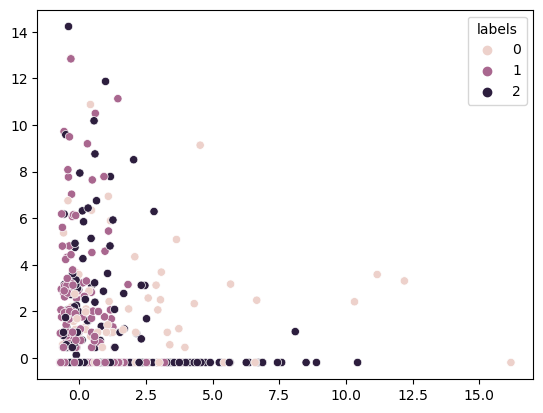

In [94]:
sns.scatterplot(x=std_df[:,0], y=std_df[:,1], hue=df1['labels'])
plt.show()

## 5.2 KMeans ++

In [51]:
print(df_list)
for data in scaled_df_list:
    model = KMeans(n_clusters=3, init='k-means++')
    model.fit(data)
    labels = model.labels_
    print(labels)
    print(silhouette_score(df,labels))

['minmax_df', 'std_df', 'norm_df', 'maxabs_df', 'power_df', 'quan_df', 'maxdiv_df']
[0 0 0 ... 1 0 0]
0.0925784753511126
[0 0 0 ... 1 0 0]
0.28858921087211564
[0 0 0 ... 0 0 0]
-0.22935792756098397
[2 2 2 ... 1 2 2]
0.09138618775276569
[0 0 0 ... 1 1 1]
-0.09678347157781234
[1 1 1 ... 2 0 1]
0.06669126947607595
[1 1 1 ... 0 1 1]
0.09123262227122647


In KMeans++ we got maximum silhouette score in Standard Scaler Data

In [52]:
kmeans_plus = KMeans(n_clusters=3, init='k-means++')
kmeans_plus.fit(std_df)
labels = kmeans_plus.labels_ 
print(labels)
silhouette_kmeans_plus = silhouette_score(df,labels)
print(silhouette_kmeans_plus)

[1 1 1 ... 0 1 1]
0.28858921087211564


In [53]:
df2 = df.copy()

In [54]:
df2['labels'] = labels

In [55]:
df2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [56]:
df2.groupby('labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,
0,117454.663759,157.509120,3.728787,1.002379,1.038065,40427.265662,18.982554,345.440127,1.022998,4886.176844,0.652657
1,44386.917995,96.870968,1.235911,1.019044,1.000389,4833.713175,7.008162,200.775360,0.626506,3705.261562,0.204042
2,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976


In [93]:
df2['labels'].value_counts()

1    2573
0    1261
2     164
Name: labels, dtype: int64

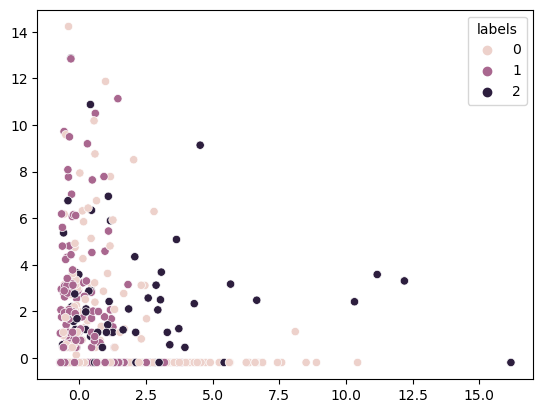

In [92]:
sns.scatterplot(x=std_df[:,0], y=std_df[:,1], hue=df2['labels'])
plt.show()

## 5.3 DBSCAN

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [60]:
model = NearestNeighbors(n_neighbors=3)
model.fit(std_df)

NearestNeighbors(n_neighbors=3)

In [61]:
distances, indices = model.kneighbors(std_df)

In [62]:
distances[:,1]

array([0.11185195, 0.11406716, 0.16540105, ..., 0.16614444, 0.25725538,
       0.00270567])

In [63]:
indices[:,1]

array([ 378,    3,  338, ..., 3876, 3623, 3491], dtype=int64)

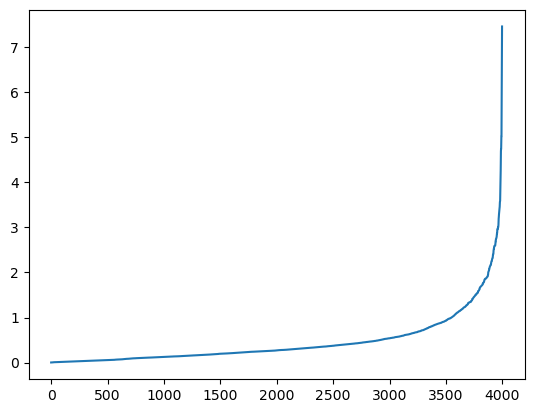

In [64]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

We can see at eps = 1.5 the graph is drastically change. So, we take eps = 1.5.

In [65]:
# Let's find the optimal value of min_samples
min_samples = [2,3,4,5,6,7,8,9,10]

In [66]:
for samples in min_samples:
    dbscan = DBSCAN(eps=1.5, min_samples=samples)
    dbscan.fit(std_df)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        print('For min_samples: ' + str(samples))
        print('silhouette_score: ' + str(silhouette_score(df, labels)))
        print('_' * 100)
    else:
        print(f"Only 1 cluster found for min_samples={samples}")

For min_samples: 2
silhouette_score: -0.7090619303713737
____________________________________________________________________________________________________
For min_samples: 3
silhouette_score: -0.4862823156822583
____________________________________________________________________________________________________
For min_samples: 4
silhouette_score: -0.40958540215332684
____________________________________________________________________________________________________
For min_samples: 5
silhouette_score: -0.3937395105040868
____________________________________________________________________________________________________
For min_samples: 6
silhouette_score: -0.37229231033488275
____________________________________________________________________________________________________
For min_samples: 7
silhouette_score: -0.3694241936089378
____________________________________________________________________________________________________
For min_samples: 8
silhouette_score: -0.3659747825

For min_samples = 5 is optimal value because silhouette_score is not further increases.

In [67]:
# Let's apply on different scaled data
for data in scaled_df_list:
    dbscan = DBSCAN(eps=1.5, min_samples=5)
    dbscan.fit(data)
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        print('silhouette_score: ' + str(silhouette_score(df, labels)))
        print('_' * 100)
    else:
        print(f"Only 1 cluster found for this data")

Only 1 cluster found for this data
silhouette_score: -0.3937395105040868
____________________________________________________________________________________________________
Only 1 cluster found for this data
Only 1 cluster found for this data
Only 1 cluster found for this data
Only 1 cluster found for this data
Only 1 cluster found for this data


We can se in all scaled data our model treate all points as noise except in Standard Scaler Data.

In [68]:
dbscan_final = DBSCAN(eps=1.5, min_samples=5)
dbscan_final.fit(std_df)
labels = dbscan_final.labels_

In [97]:
dbscan_silhouette = silhouette_score(df,labels)
dbscan_silhouette

-0.3937395105040868

In [70]:
df3 = df.copy()

In [71]:
df3['labels'] = labels

In [72]:
df3.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award,labels
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [73]:
df3.groupby('labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12month,Flight_trans_12month,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
labels,,,,,,,,,,,
-1,215733.335484,1381.900000,2.764516,1.070968,1.158065,45721.603226,25.261290,2994.580645,8.758065,4818.754839,0.729032
0,56548.754357,29.264315,1.684647,1.000000,1.000000,9593.251452,8.732365,173.117012,0.512863,3806.238174,0.000000
1,72115.619200,61.918400,2.632000,1.000000,1.000000,24773.415200,13.712800,392.944800,1.223200,4567.045600,1.000000
2,38556.733333,0.000000,1.000000,2.000000,1.000000,8951.533333,12.933333,60.000000,0.400000,3390.400000,0.000000
3,36524.250000,0.000000,1.000000,3.000000,1.000000,15518.500000,14.500000,50.000000,0.250000,3179.625000,0.000000
4,31161.600000,0.000000,1.000000,2.000000,1.000000,8723.400000,13.800000,350.000000,1.000000,3314.800000,1.000000


In [83]:
df3[['labels']].value_counts()

labels
 0        2410
 1        1250
-1         310
 2          15
 3           8
 4           5
dtype: int64

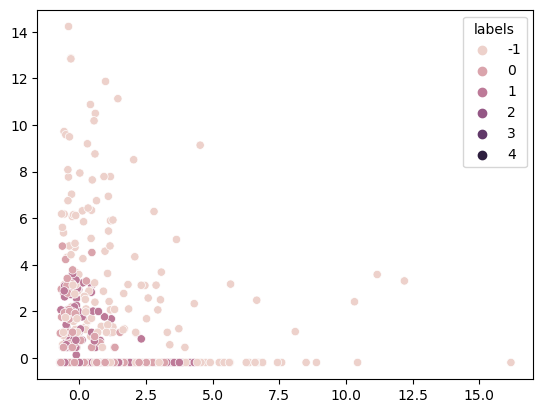

In [90]:
sns.scatterplot(x=std_df[:,0], y=std_df[:,1], hue=df3['labels'], color=colors)
plt.show()

In [101]:
metric_df = pd.DataFrame({'Model':['KMeans', 'KMeans++', 'DBSCAN'],
                         'silhouette_score':[kmeans_silhouette, silhouette_kmeans_plus, dbscan_silhouette]})
metric_df.sort_values('silhouette_score',ascending=False)

,Model,silhouette_score
1,KMeans++,0.288589
0,KMeans,0.288298
2,DBSCAN,-0.393740


# 6. Conclusion

* First I build KMeans Model in which I got 3 clusters as threshold values.
* Second I build KMeans++ Model in which also I got 3 cluster after ploting elbow plot.
* Third I build the DBSCAN Model in which our model gives huge number of Noise points as output.
* Above all models KMeans++ have highest silhouette_score.